>### Task 20

### The IMDB Dataset

#### Loading the IMDB dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#### Decoding the reviews

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### Encoding the integer sequences into a binary matrix

In [4]:
import numpy as numpy

def vectorize_sequences(sequences, dimension=10000):
    results = numpy.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

y_train = numpy.asarray(train_labels).astype('float32')
y_test  = numpy.asarray(test_labels).astype('float32')

#### Model definition

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

#### Compiling the model

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### Configuring the optimizer

In [7]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#### Using custom losses and metrics

In [8]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


#### Setting aside a validation set

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#### Training your model

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 6s 174ms/step - loss: 0.5401 - acc: 0.7683 - val_loss: 0.4089 - val_acc: 0.8546
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3359 - acc: 0.8898 - val_loss: 0.3170 - val_acc: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2503 - acc: 0.9155 - val_loss: 0.2927 - val_acc: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2011 - acc: 0.9321 - val_loss: 0.2741 - val_acc: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1706 - acc: 0.9435 - val_loss: 0.2905 - val_acc: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1420 - acc: 0.9538 - val_loss: 0.2805 - val_acc: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1252 - acc: 0.9618 - val_loss: 0.2919 - val_acc: 0.8869
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1041 - 

#### Dictionary of history values

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### Plotting the training and validation loss

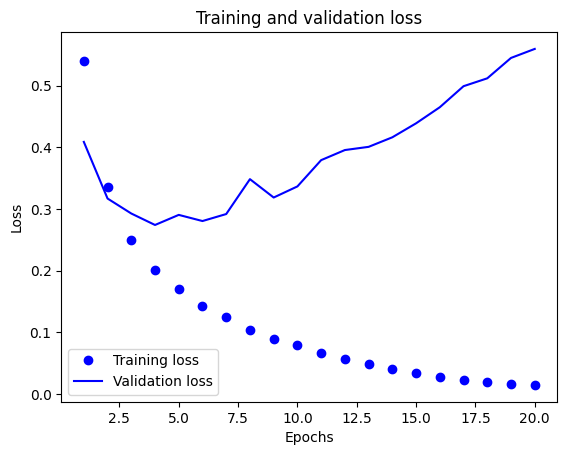

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Plotting the training and validation accuracy

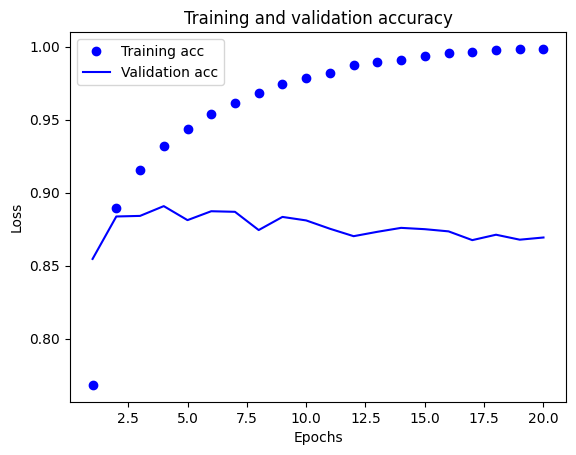

In [13]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Retrain from scratch

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 3s 34ms/step - loss: 0.4755 - accuracy: 0.8121
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2828 - accuracy: 0.9008
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2223 - accuracy: 0.9213
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2948 - accuracy: 0.8809


#### Final results

In [15]:
results

[0.29480335116386414, 0.8809199929237366]